In [1]:
import numpy as np
import pandas as pd

# Multi Index
Series is 1D and DataFrames are 2D objects
- But why?
- And what exactly is index?

## This is used to represent ANY higher dimension data into a lower dimension data like DataFrame or Series

In [2]:
# can we have multiple index? Let's try
index_val = [('cse', 2019), ('cse', 2020), ('cse', 2021), ('cse', 2022), ('ece', 2019), ('ece', 2020), ('ece', 2021),
             ('ece', 2022)]
index_val

[('cse', 2019),
 ('cse', 2020),
 ('cse', 2021),
 ('cse', 2022),
 ('ece', 2019),
 ('ece', 2020),
 ('ece', 2021),
 ('ece', 2022)]

In [3]:
a = pd.Series([1, 2, 3, 4, 5, 6, 7, 8], index=index_val)
a

(cse, 2019)    1
(cse, 2020)    2
(cse, 2021)    3
(cse, 2022)    4
(ece, 2019)    5
(ece, 2020)    6
(ece, 2021)    7
(ece, 2022)    8
dtype: int64

In [4]:
a[('cse', 2022)]

4

In [5]:
# The problem?
a[('cse')]

KeyError: 'cse'

### Above code is not the correct way to create a multi index series
--> Create a multiindex series(also known as Hierarchical Indexing)

Multiple index levels within a single index


### The proper way is 
1 - pd.MultiIndex.from_tuples()

2 - pd.MultiIndex.from_product()

In [7]:
index_val = [('cse', 2019), ('cse', 2020), ('cse', 2021), ('cse', 2022), ('ece', 2019), ('ece', 2020), ('ece', 2021),
             ('ece', 2022)]
multiindex = pd.MultiIndex.from_tuples(index_val)
multiindex

MultiIndex([('cse', 2019),
            ('cse', 2020),
            ('cse', 2021),
            ('cse', 2022),
            ('ece', 2019),
            ('ece', 2020),
            ('ece', 2021),
            ('ece', 2022)],
           )

In [8]:
# Levels inside the multiindex object
# This will treat both items in the tuples separately
multiindex.levels

FrozenList([['cse', 'ece'], [2019, 2020, 2021, 2022]])

In [9]:
multiindex.levels[0]

Index(['cse', 'ece'], dtype='object')

In [10]:
multiindex.levels[1]

Index([2019, 2020, 2021, 2022], dtype='int64')

In [11]:
# It did cartesian product 
# where each item is multiplied by each item 
multiindex2 = pd.MultiIndex.from_product([['cse', 'ece'], [2019, 2020, 2021, 2022]])
multiindex2

MultiIndex([('cse', 2019),
            ('cse', 2020),
            ('cse', 2021),
            ('cse', 2022),
            ('ece', 2019),
            ('ece', 2020),
            ('ece', 2021),
            ('ece', 2022)],
           )

In [12]:
# creating a series with multiindex object
# The size should be same, here we have 8 values in multiindex2, so the series should also have 8 values
s = pd.Series([1, 2, 3, 4, 5, 6, 7, 8], index=multiindex2)
s

cse  2019    1
     2020    2
     2021    3
     2022    4
ece  2019    5
     2020    6
     2021    7
     2022    8
dtype: int64

In [13]:
# This is hierarchical because in cse we have 4 years
# how to fetch items from such as series 

s[('cse', 2022)]

4

In [14]:
s['cse']

2019    1
2020    2
2021    3
2022    4
dtype: int64

In [15]:
s['cse'][2021]

4

A logical question to ask

How many dimensions is this?

Ans - This is 2D

Why should I make this and not a DataFrame instead?

Yes, you can make this as a DataFrame using `unstack`

In [16]:
temp = s.unstack()
print(temp)

     2019  2020  2021  2022
cse     1     2     3     4
ece     5     6     7     8


In [17]:
temp.loc['cse', 2022]

4

In [18]:
temp[2022]['cse']

4

What if we want to make it back as Multiindex?

Use `stack`

In [19]:
s_orig = temp.stack()
s_orig

cse  2019    1
     2020    2
     2021    3
     2022    4
ece  2019    5
     2020    6
     2021    7
     2022    8
dtype: int64

### The true power of this pandas multiindex is to make any dimensional data 3D and up to 2D data

### MultiIndex DataFrame

In [20]:
branch_df1 = pd.DataFrame(
    [
        [1, 2],
        [3, 4],
        [5, 6],
        [7, 8],
        [9, 10],
        [11, 12],
        [13, 14],
        [15, 16]
    ],
    index=multiindex,
    columns=['avg_package', 'students']
)

branch_df1

avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ece 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

In [21]:
branch_df1.loc['cse']

,avg_package,students
2019,1,2
2020,3,4
2021,5,6
2022,7,8


In [22]:
branch_df1.loc['ece']

,avg_package,students
2019,9,10
2020,11,12
2021,13,14
2022,15,16


In [23]:
branch_df1['avg_package']

cse  2019     1
     2020     3
     2021     5
     2022     7
ece  2019     9
     2020    11
     2021    13
     2022    15
Name: avg_package, dtype: int64

In [24]:
# multiindex df from columns perspective
branch_df2 = pd.DataFrame(
    [
        [1, 2, 0, 0],
        [3, 4, 0, 0],
        [5, 6, 0, 0],
        [7, 8, 0, 0]
    ],
    index=[2019, 2020, 2021, 2022],
    columns=pd.MultiIndex.from_product([['delhi', 'mumbai'], ['avg_package', 'students']])
)

print(branch_df2)

           delhi               mumbai         
     avg_package students avg_package students
2019           1        2           0        0
2020           3        4           0        0
2021           5        6           0        0
2022           7        8           0        0


In [25]:
branch_df2['delhi']

,avg_package,students
2019,1,2
2020,3,4
2021,5,6
2022,7,8


In [26]:
branch_df2['delhi']['avg_package']

2019    1
2020    3
2021    5
2022    7
Name: avg_package, dtype: int64

In [27]:
branch_df2.loc[2019]

delhi   avg_package    1
        students       2
mumbai  avg_package    0
        students       0
Name: 2019, dtype: int64

In [28]:
# multiindex df in terms of both cols and index
# 
branch_df3 = pd.DataFrame(
    [
        [1, 2, 0, 0],
        [3, 4, 0, 0],
        [5, 6, 0, 0],
        [7, 8, 0, 0],
        [9, 10, 0, 0],
        [11, 12, 0, 0],
        [13, 14, 0, 0],
        [15, 16, 0, 0]
    ],
    index=pd.MultiIndex.from_product([['cse', 'ece'], [2019, 2020, 2021, 2022]]),
    columns=pd.MultiIndex.from_product([['delhi', 'mumbai'], ['avg_package', 'students']])
)

print(branch_df3)

               delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0


In [29]:
branch_df3['delhi']['students']['cse'][2020]

4

## Stacking and Unstacking



#### unstack on 3D  with multi index columns

In [30]:
print(branch_df1)

          avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ece 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16


In [31]:
# The year (inner) level is taken and mixed with columns
print(branch_df1.unstack())

    avg_package                students               
           2019 2020 2021 2022     2019 2020 2021 2022
cse           1    3    5    7        2    4    6    8
ece           9   11   13   15       10   12   14   16


In [32]:
# if we apply unstack() again
# the branch level is taken and mixed with columns
# hence we get a Series

print(branch_df1.unstack().unstack())
print(type(branch_df1.unstack().unstack()))

avg_package  2019  cse     1
                   ece     9
             2020  cse     3
                   ece    11
             2021  cse     5
                   ece    13
             2022  cse     7
                   ece    15
students     2019  cse     2
                   ece    10
             2020  cse     4
                   ece    12
             2021  cse     6
                   ece    14
             2022  cse     8
                   ece    16
dtype: int64
<class 'pandas.core.series.Series'>


#### stack on 3D  with multi index rows

In [109]:
branch_df1

avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ece 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

In [33]:
# We got back the original branch_df1
branch_df1.unstack().stack(future_stack=True)

avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ece 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

In [113]:
branch_df1.unstack().stack(future_stack=True).stack(future_stack=True)

cse  2019  avg_package     1
           students        2
     2020  avg_package     3
           students        4
     2021  avg_package     5
           students        6
     2022  avg_package     7
           students        8
ece  2019  avg_package     9
           students       10
     2020  avg_package    11
           students       12
     2021  avg_package    13
           students       14
     2022  avg_package    15
           students       16
dtype: int64

In [110]:
# future_stack = True preserved the null values and does not sort
import pandas as pd
import numpy as np

# Example DataFrame
data = {
    'A': [1, 2, np.nan], 
    'B': [4, np.nan, 6], 
    'C': [7, 8, 9]
}

df = pd.DataFrame(data, index=['X', 'Y', 'Z'])

# Stacking with future_stack=True
stacked_df = df.stack(future_stack=True)

print("Original DataFrame:\n", df)
print("\nStacked DataFrame (future_stack=True):\n", stacked_df)

Original DataFrame:
      A    B  C
X  1.0  4.0  7
Y  2.0  NaN  8
Z  NaN  6.0  9

Stacked DataFrame (future_stack=True):
 X  A    1.0
   B    4.0
   C    7.0
Y  A    2.0
   B    NaN
   C    8.0
Z  A    NaN
   B    6.0
   C    9.0
dtype: float64


In [121]:
df.isnull()

,A,B,C
X,False,False,False
Y,False,True,False
Z,True,False,False


#### unstack on 3D with multi index columns

In [35]:
print(branch_df2)

           delhi               mumbai         
     avg_package students avg_package students
2019           1        2           0        0
2020           3        4           0        0
2021           5        6           0        0
2022           7        8           0        0


In [36]:
print(branch_df2.unstack())
print(type(branch_df2.unstack()))

delhi   avg_package  2019    1
                     2020    3
                     2021    5
                     2022    7
        students     2019    2
                     2020    4
                     2021    6
                     2022    8
mumbai  avg_package  2019    0
                     2020    0
                     2021    0
                     2022    0
        students     2019    0
                     2020    0
                     2021    0
                     2022    0
dtype: int64
<class 'pandas.core.series.Series'>


#### stack on 3D with multi index columns

In [115]:
print(branch_df2)

           delhi               mumbai         
     avg_package students avg_package students
2019           1        2           0        0
2020           3        4           0        0
2021           5        6           0        0
2022           7        8           0        0


In [116]:
branch_df2.shape

(4, 4)

In [117]:
branch_df2.index

Index([2019, 2020, 2021, 2022], dtype='int64')

In [118]:
branch_df2.columns

MultiIndex([( 'delhi', 'avg_package'),
            ( 'delhi',    'students'),
            ('mumbai', 'avg_package'),
            ('mumbai',    'students')],
           )

In [37]:
branch_df2.stack(future_stack=True)

delhi  mumbai
2019 avg_package      1       0
     students         2       0
2020 avg_package      3       0
     students         4       0
2021 avg_package      5       0
     students         6       0
2022 avg_package      7       0
     students         8       0

In [38]:
print(branch_df2.stack(future_stack=True).stack(future_stack=True))

2019  avg_package  delhi     1
                   mumbai    0
      students     delhi     2
                   mumbai    0
2020  avg_package  delhi     3
                   mumbai    0
      students     delhi     4
                   mumbai    0
2021  avg_package  delhi     5
                   mumbai    0
      students     delhi     6
                   mumbai    0
2022  avg_package  delhi     7
                   mumbai    0
      students     delhi     8
                   mumbai    0
dtype: int64


#### unstack on 4D

In [39]:
print(branch_df3)

               delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0


In [119]:
branch_df3.index

MultiIndex([('cse', 2019),
            ('cse', 2020),
            ('cse', 2021),
            ('cse', 2022),
            ('ece', 2019),
            ('ece', 2020),
            ('ece', 2021),
            ('ece', 2022)],
           )

In [120]:
branch_df3.columns

MultiIndex([( 'delhi', 'avg_package'),
            ( 'delhi',    'students'),
            ('mumbai', 'avg_package'),
            ('mumbai',    'students')],
           )

In [40]:
print(branch_df3.unstack())

          delhi                                             mumbai            \
    avg_package                students                avg_package             
           2019 2020 2021 2022     2019 2020 2021 2022        2019 2020 2021   
cse           1    3    5    7        2    4    6    8           0    0    0   
ece           9   11   13   15       10   12   14   16           0    0    0   

                                  
         students                 
    2022     2019 2020 2021 2022  
cse    0        0    0    0    0  
ece    0        0    0    0    0  


In [41]:
print(branch_df3.unstack().unstack())

delhi   avg_package  2019  cse     1
                           ece     9
                     2020  cse     3
                           ece    11
                     2021  cse     5
                           ece    13
                     2022  cse     7
                           ece    15
        students     2019  cse     2
                           ece    10
                     2020  cse     4
                           ece    12
                     2021  cse     6
                           ece    14
                     2022  cse     8
                           ece    16
mumbai  avg_package  2019  cse     0
                           ece     0
                     2020  cse     0
                           ece     0
                     2021  cse     0
                           ece     0
                     2022  cse     0
                           ece     0
        students     2019  cse     0
                           ece     0
                     2020  cse     0
 

#### stack on 4D

In [42]:
print(branch_df3)

               delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0


In [43]:
branch_df3.stack(future_stack=True)

delhi  mumbai
cse 2019 avg_package      1       0
         students         2       0
    2020 avg_package      3       0
         students         4       0
    2021 avg_package      5       0
         students         6       0
    2022 avg_package      7       0
         students         8       0
ece 2019 avg_package      9       0
         students        10       0
    2020 avg_package     11       0
         students        12       0
    2021 avg_package     13       0
         students        14       0
    2022 avg_package     15       0
         students        16       0

In [44]:
print(branch_df3.stack(future_stack=True).stack(future_stack=True))

cse  2019  avg_package  delhi      1
                        mumbai     0
           students     delhi      2
                        mumbai     0
     2020  avg_package  delhi      3
                        mumbai     0
           students     delhi      4
                        mumbai     0
     2021  avg_package  delhi      5
                        mumbai     0
           students     delhi      6
                        mumbai     0
     2022  avg_package  delhi      7
                        mumbai     0
           students     delhi      8
                        mumbai     0
ece  2019  avg_package  delhi      9
                        mumbai     0
           students     delhi     10
                        mumbai     0
     2020  avg_package  delhi     11
                        mumbai     0
           students     delhi     12
                        mumbai     0
     2021  avg_package  delhi     13
                        mumbai     0
           students     delhi     14
 

## Working with MultiIndex DataFrames

In [45]:
# head and tail
print(branch_df3)
# shape
# info
# duplicated -> isnull

               delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0


In [46]:
print(branch_df3.head())

               delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0


In [47]:
print(branch_df3.tail())

               delhi               mumbai         
         avg_package students avg_package students
cse 2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0


In [48]:
branch_df3.shape

(8, 4)

In [49]:
branch_df3.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8 entries, ('cse', 2019) to ('ece', 2022)
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   (delhi, avg_package)   8 non-null      int64
 1   (delhi, students)      8 non-null      int64
 2   (mumbai, avg_package)  8 non-null      int64
 3   (mumbai, students)     8 non-null      int64
dtypes: int64(4)
memory usage: 632.0+ bytes


In [50]:
branch_df3.unstack().info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, cse to ece
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   (delhi, avg_package, 2019)   2 non-null      int64
 1   (delhi, avg_package, 2020)   2 non-null      int64
 2   (delhi, avg_package, 2021)   2 non-null      int64
 3   (delhi, avg_package, 2022)   2 non-null      int64
 4   (delhi, students, 2019)      2 non-null      int64
 5   (delhi, students, 2020)      2 non-null      int64
 6   (delhi, students, 2021)      2 non-null      int64
 7   (delhi, students, 2022)      2 non-null      int64
 8   (mumbai, avg_package, 2019)  2 non-null      int64
 9   (mumbai, avg_package, 2020)  2 non-null      int64
 10  (mumbai, avg_package, 2021)  2 non-null      int64
 11  (mumbai, avg_package, 2022)  2 non-null      int64
 12  (mumbai, students, 2019)     2 non-null      int64
 13  (mumbai, students, 2020)     2 non-null      int64
 14 

In [51]:
branch_df3.duplicated()

cse  2019    False
     2020    False
     2021    False
     2022    False
ece  2019    False
     2020    False
     2021    False
     2022    False
dtype: bool

In [52]:
branch_df3.isnull()

delhi               mumbai         
         avg_package students avg_package students
cse 2019       False    False       False    False
    2020       False    False       False    False
    2021       False    False       False    False
    2022       False    False       False    False
ece 2019       False    False       False    False
    2020       False    False       False    False
    2021       False    False       False    False
    2022       False    False       False    False

In [53]:
# Extracting rows and single
print(branch_df3)

               delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0


In [54]:
branch_df3.loc[('cse', 2022)]

delhi   avg_package    7
        students       8
mumbai  avg_package    0
        students       0
Name: (cse, 2022), dtype: int64

In [55]:
# multiple
print(branch_df3.loc[('cse', 2019):('ece', 2020):2])

               delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2021           5        6           0        0
ece 2019           9       10           0        0


In [56]:
print(branch_df3.iloc[0])

delhi   avg_package    1
        students       2
mumbai  avg_package    0
        students       0
Name: (cse, 2019), dtype: int64


In [57]:
print(branch_df3.iloc[0:5:2])

               delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2021           5        6           0        0
ece 2019           9       10           0        0


In [58]:
# Extracting columns
print(branch_df3['delhi'])

          avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ece 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16


In [59]:
print(branch_df3['delhi']['students'])

cse  2019     2
     2020     4
     2021     6
     2022     8
ece  2019    10
     2020    12
     2021    14
     2022    16
Name: students, dtype: int64


In [60]:
print(branch_df3.iloc[:, [1, 2]])

            delhi      mumbai
         students avg_package
cse 2019        2           0
    2020        4           0
    2021        6           0
    2022        8           0
ece 2019       10           0
    2020       12           0
    2021       14           0
    2022       16           0


In [61]:
# Extracting both row and col
print(branch_df3.iloc[::4, 1:3])

            delhi      mumbai
         students avg_package
cse 2019        2           0
ece 2019       10           0


In [62]:
# with fancy indexing
print(branch_df3.iloc[[0, 4], [1, 2]])

            delhi      mumbai
         students avg_package
cse 2019        2           0
ece 2019       10           0


In [63]:
# sort index
print(branch_df3.sort_index(ascending=False))

               delhi               mumbai         
         avg_package students avg_package students
ece 2022          15       16           0        0
    2021          13       14           0        0
    2020          11       12           0        0
    2019           9       10           0        0
cse 2022           7        8           0        0
    2021           5        6           0        0
    2020           3        4           0        0
    2019           1        2           0        0


In [64]:
print(branch_df3.sort_index(ascending=[False, True]))

               delhi               mumbai         
         avg_package students avg_package students
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0


In [65]:
# sorting only on one level
print(branch_df3.sort_index(level=1, ascending=[False]))

               delhi               mumbai         
         avg_package students avg_package students
cse 2022           7        8           0        0
ece 2022          15       16           0        0
cse 2021           5        6           0        0
ece 2021          13       14           0        0
cse 2020           3        4           0        0
ece 2020          11       12           0        0
cse 2019           1        2           0        0
ece 2019           9       10           0        0


In [66]:
# MultiIndex DataFrame(col) -> transpose 
print(branch_df3.transpose())

                    cse                 ece               
                   2019 2020 2021 2022 2019 2020 2021 2022
delhi  avg_package    1    3    5    7    9   11   13   15
       students       2    4    6    8   10   12   14   16
mumbai avg_package    0    0    0    0    0    0    0    0
       students       0    0    0    0    0    0    0    0


In [67]:
# swaplevel
# default axis=0
print(branch_df3.swaplevel())

               delhi               mumbai         
         avg_package students avg_package students
2019 cse           1        2           0        0
2020 cse           3        4           0        0
2021 cse           5        6           0        0
2022 cse           7        8           0        0
2019 ece           9       10           0        0
2020 ece          11       12           0        0
2021 ece          13       14           0        0
2022 ece          15       16           0        0


In [68]:
print(branch_df3.swaplevel(axis=1))

         avg_package students avg_package students
               delhi    delhi      mumbai   mumbai
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0


### Long Vs Wide Data
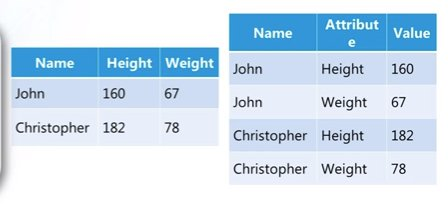

**Wide format** is where we have a single row for every data point with multiple columns to hold the values of various attributes.

**Long format** is where, for each data point we have as many rows as the number of attributes and each row contains the value of a particular attribute for a given data point.

In [69]:
# melt -> simple example branch
# Wide to Long
df1 = pd.DataFrame({'cse': [120]})
df1

,cse
0,120


In [70]:
df1.melt()

,variable,value
0,cse,120


In [71]:
# melt -> branch with year
df2 = pd.DataFrame({'cse': [120], 'ece': [100], 'mech': [50]})
df2

,cse,ece,mech
0,120,100,50


In [72]:
df2.melt()

,variable,value
0,cse,120
1,ece,100
2,mech,50


In [73]:
df2.melt(var_name='branch', value_name='num_students')

,branch,num_students
0,cse,120
1,ece,100
2,mech,50


In [74]:
df3 = pd.DataFrame(
    {
        'branch': ['ece', 'cse', 'mech'],
        '2020': [120, 100, 50],
        '2021': [130, 115, 60],
        '2022': [125, 120, 70]
    }
)
df3

,branch,2020,2021,2022
0,ece,120,130,125
1,cse,100,115,120
2,mech,50,60,70


In [75]:
df3.melt()

,variable,value
0,branch,ece
1,branch,cse
2,branch,mech
3,2020,120
4,2020,100
5,2020,50
6,2021,130
7,2021,115
8,2021,60
9,2022,125


In [76]:
# we only wanted years to become the row and not the branch as well
# we use id_var=[]
df3.melt(id_vars=['branch'], var_name='year', value_name='no of students')

,branch,year,no of students
0,ece,2020,120
1,cse,2020,100
2,mech,2020,50
3,ece,2021,130
4,cse,2021,115
5,mech,2021,60
6,ece,2022,125
7,cse,2022,120
8,mech,2022,70


In [77]:
# sometimes we get data in long and not in wide. Hence, we require melt to change
# melt -> real world example
death = pd.read_csv('time_series_covid19_deaths_global.csv')
confirm = pd.read_csv('time_series_covid19_confirmed_global.csv')
death.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7845,7846,7846,7846,7846,7847,7847,7849,7849,7849
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3595,3595,3595,3595,3595,3595,3595,3595,3595,3595
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1928,1928,1928,1930,1930,1930,1930,1930,1930,1930


In [78]:
death.shape

(289, 1081)

In [79]:
confirm.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,207310,207399,207438,207460,207493,207511,207550,207559,207616,207627
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,333749,333749,333751,333751,333776,333776,333806,333806,333811,333812
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271194,271198,271198,271202,271208,271217,271223,271228,271229,271229
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47686,47686,47686,47686,47751,47751,47751,47751,47751,47751
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,104973,104973,104973,105095,105095,105095,105095,105095,105095,105095


In [80]:
confirm.shape

(289, 1081)

In [81]:
# Manager asks you to make a type of data where the columns are 
# Country  |  Date  |  Confirm  |  Deaths
# USA      |  3 Jan |  1000     |    30
# India    |  3 Jan |  2000     |    20
# India    |  2 Jan |  2500     |    15

# First we melt both data sets and 
# then merge it

In [82]:
death = death.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name='Date',
                   value_name='no_of_deaths')
death

,Province/State,Country/Region,Lat,Long,Date,no_of_deaths
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
311248,NaN,West Bank and Gaza,31.952200,35.233200,1/2/23,5708
311249,NaN,Winter Olympics 2022,39.904200,116.407400,1/2/23,0
311250,NaN,Yemen,15.552727,48.516388,1/2/23,2159
311251,NaN,Zambia,-13.133897,27.849332,1/2/23,4024


In [83]:
confirm = confirm.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name='Date',
                       value_name='no_of_cases')
confirm

,Province/State,Country/Region,Lat,Long,Date,no_of_cases
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
311248,NaN,West Bank and Gaza,31.952200,35.233200,1/2/23,703228
311249,NaN,Winter Olympics 2022,39.904200,116.407400,1/2/23,535
311250,NaN,Yemen,15.552727,48.516388,1/2/23,11945
311251,NaN,Zambia,-13.133897,27.849332,1/2/23,334661


In [84]:
confirm.merge(death, on=['Province/State', 'Country/Region', 'Lat', 'Long', 'Date'])[
    ['Country/Region', 'Date', 'no_of_cases', 'no_of_deaths']]

,Country/Region,Date,no_of_cases,no_of_deaths
0,Afghanistan,1/22/20,0,0
1,Albania,1/22/20,0,0
2,Algeria,1/22/20,0,0
3,Andorra,1/22/20,0,0
4,Angola,1/22/20,0,0
...,...,...,...,...
311248,West Bank and Gaza,1/2/23,703228,5708
311249,Winter Olympics 2022,1/2/23,535,0
311250,Yemen,1/2/23,11945,2159
311251,Zambia,1/2/23,334661,4024


### Pivot Table

The pivot table takes simple column-wise data as input, and groups the entries into a two-dimensional table that provides a multidimensional summarization of the data.

In [123]:
import seaborn as sns
import numpy as np
import pandas as pd

df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [86]:
df.shape

(244, 7)

In [125]:
df.groupby('sex', observed=True)['total_bill'].mean()

sex
Male      20.744076
Female    18.056897
Name: total_bill, dtype: float64

In [88]:
gender_vs_smoker_mean = df.groupby(['sex', 'smoker'], observed=True)['total_bill'].mean()
gender_vs_smoker_mean

sex     smoker
Male    Yes       22.284500
        No        19.791237
Female  Yes       17.977879
        No        18.105185
Name: total_bill, dtype: float64

In [89]:
# This is kind of 3D data with gender, smoker and total_bill
print(gender_vs_smoker_mean.unstack())

smoker        Yes         No
sex                         
Male    22.284500  19.791237
Female  17.977879  18.105185


In [90]:
# same answer can be generated with pivot table
print(df.pivot_table(index='sex', columns='smoker', values='total_bill', observed=True))

smoker        Yes         No
sex                         
Male    22.284500  19.791237
Female  17.977879  18.105185


In [91]:
# aggfunc
# default value of this is "mean"
# But we can apply others as well
# sum, count, std, median, var
print(df.pivot_table(index='sex', columns='smoker', values='total_bill', observed=True, aggfunc='count'))

smoker  Yes  No
sex            
Male     60  97
Female   33  54


In [92]:
# all cols together
# This is NOT Possible in newer versions
# df_numeric = df.select_dtypes(include=[np.number])
# print(df.pivot_table(index='sex', columns='smoker', observed=True, values='tip'))
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [93]:
# Multidimensional
print(df.pivot_table(index=['sex', 'smoker'], columns=['day', 'time'], values='total_bill', observed=True))

day                 Thur               Fri                Sat        Sun
time               Lunch Dinner      Lunch  Dinner     Dinner     Dinner
sex    smoker                                                           
Male   Yes     19.171000    NaN  11.386667  25.892  21.837778  26.141333
       No      18.486500    NaN        NaN  17.475  19.929063  20.403256
Female Yes     19.218571    NaN  13.260000  12.200  20.266667  16.540000
       No      15.899167  18.78  15.980000  22.750  19.003846  20.824286


In [94]:
# on all numeric cols
print(df.pivot_table(index=['sex', 'smoker'], columns=['day', 'time'], observed=True))

                   size                                                   tip  \
day                Thur              Fri              Sat       Sun      Thur   
time              Lunch Dinner     Lunch Dinner    Dinner    Dinner     Lunch   
sex    smoker                                                                   
Male   Yes     2.300000    NaN  1.666667    2.4  2.629630  2.600000  3.058000   
       No      2.500000    NaN       NaN    2.0  2.656250  2.883721  2.941500   
Female Yes     2.428571    NaN  2.000000    2.0  2.200000  2.500000  2.990000   
       No      2.500000    2.0  3.000000    2.0  2.307692  3.071429  2.437083   

                                                      total_bill         \
day                    Fri              Sat       Sun       Thur          
time          Dinner Lunch Dinner    Dinner    Dinner      Lunch Dinner   
sex    smoker                                                             
Male   Yes       NaN  1.90  3.246  2.879259  3.5213

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [130]:
df.select_dtypes(include='category').columns

Index(['sex', 'smoker', 'day', 'time'], dtype='object')

In [131]:
df.select_dtypes(include='number').columns

Index(['total_bill', 'tip', 'size'], dtype='object')

In [134]:
# on number of aggfunc
print(df.pivot_table(index=['sex', 'smoker'], columns=['day', 'time'],
                     aggfunc={
                         'size': 'mean',
                         'total_bill': 'sum',
                         'tip': 'max'
                     },
                     observed=True))

                   size                                               tip  \
day                Thur              Fri              Sat       Sun  Thur   
time              Lunch Dinner     Lunch Dinner    Dinner    Dinner Lunch   
sex    smoker                                                               
Male   Yes     2.300000    NaN  1.666667    2.4  2.629630  2.600000  5.00   
       No      2.500000    NaN       NaN    2.0  2.656250  2.883721  6.70   
Female Yes     2.428571    NaN  2.000000    2.0  2.200000  2.500000  5.00   
       No      2.500000    2.0  3.000000    2.0  2.307692  3.071429  5.17   

                                                total_bill                \
day                    Fri           Sat    Sun       Thur           Fri   
time          Dinner Lunch Dinner Dinner Dinner      Lunch Dinner  Lunch   
sex    smoker                                                              
Male   Yes       NaN  2.20   4.73  10.00    6.5     191.71    NaN  34.16   
   

In [133]:
print(df.pivot_table(index=['sex', 'smoker'], columns=['day', 'time'],
                     aggfunc={
                         'size': ['mean', 'count'],
                         'total_bill': 'sum',
                         'tip': 'max'
                     },
                     observed=True))

               size                                                     \
              count                                        mean          
day            Thur          Fri           Sat    Sun      Thur          
time          Lunch Dinner Lunch Dinner Dinner Dinner     Lunch Dinner   
sex    smoker                                                            
Male   Yes     10.0    NaN   3.0    5.0   27.0   15.0  2.300000    NaN   
       No      20.0    NaN   NaN    2.0   32.0   43.0  2.500000    NaN   
Female Yes      7.0    NaN   3.0    4.0   15.0    4.0  2.428571    NaN   
       No      24.0    1.0   1.0    1.0   13.0   14.0  2.500000    2.0   

                                ...   tip                      total_bill  \
                                ...   max                             sum   
day                 Fri         ...   Fri           Sat    Sun       Thur   
time              Lunch Dinner  ... Lunch Dinner Dinner Dinner      Lunch   
sex    smoker            

In [96]:
# totals of each row and col
# margins
print(df.pivot_table(index='sex', columns='smoker', values='total_bill', aggfunc='sum', observed=True, margins=True))

smoker      Yes       No      All
sex                              
Male    1337.07  1919.75  3256.82
Female   593.27   977.68  1570.95
All     1930.34  2897.43  4827.77


In [97]:

print(df.pivot_table(index=['sex', 'smoker'], columns=['day', 'time'],
                     aggfunc={
                         'size': 'mean',
                         'total_bill': 'sum',
                         'tip': 'max'
                     },
                     observed=True,
                     margins=True))

                   size                                                 \
day                Thur              Fri                 Sat       Sun   
time              Lunch Dinner     Lunch    Dinner    Dinner    Dinner   
sex    smoker                                                            
Male   Yes     2.300000    NaN  1.666667  2.400000  2.629630  2.600000   
       No      2.500000    NaN       NaN  2.000000  2.656250  2.883721   
Female Yes     2.428571    NaN  2.000000  2.000000  2.200000  2.500000   
       No      2.500000    2.0  3.000000  2.000000  2.307692  3.071429   
All            2.459016    2.0  2.000000  2.166667  2.517241  2.842105   

                          tip               ...                      \
day                 All  Thur          Fri  ...    Sat    Sun   All   
time                    Lunch Dinner Lunch  ... Dinner Dinner         
sex    smoker                               ...                       
Male   Yes     2.500000  5.00    NaN  2.20  ...  

In [98]:
# plotting graphs
expense_df = pd.read_csv('expense_data.csv')
expense_df.sample(5)

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
71,1/27/2022 21:25,CUB - online payment,Transportation,NaN,Rapido to pg,43.0,Expense,NaN,43.0,INR,43.0
88,1/23/2022 21:29,CUB - online payment,Food,NaN,Lunch,302.0,Expense,NaN,302.0,INR,302.0
29,2/19/2022 23:03,CUB - online payment,Food,NaN,Random stuff for drinks,111.0,Expense,NaN,111.0,INR,111.0
271,11/23/2021 22:53,CUB - online payment,Food,NaN,Dinner,179.0,Expense,NaN,179.0,INR,179.0
118,1/11/2022 14:07,CUB - online payment,Food,NaN,Lunch with not preethi,135.5,Expense,NaN,135.5,INR,135.5


In [99]:
expense_df['Category'].value_counts()

Category
Food                156
Other                60
Transportation       31
Apparel               7
Household             6
Allowance             6
Social Life           5
Education             1
Salary                1
Self-development      1
Beauty                1
Gift                  1
Petty cash            1
Name: count, dtype: int64

In [100]:
expense_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            277 non-null    object 
 1   Account         277 non-null    object 
 2   Category        277 non-null    object 
 3   Subcategory     0 non-null      float64
 4   Note            273 non-null    object 
 5   INR             277 non-null    float64
 6   Income/Expense  277 non-null    object 
 7   Note.1          0 non-null      float64
 8   Amount          277 non-null    float64
 9   Currency        277 non-null    object 
 10  Account.1       277 non-null    float64
dtypes: float64(5), object(6)
memory usage: 23.9+ KB


In [101]:
expense_df['Date'] = pd.to_datetime(expense_df['Date'])
expense_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            277 non-null    datetime64[ns]
 1   Account         277 non-null    object        
 2   Category        277 non-null    object        
 3   Subcategory     0 non-null      float64       
 4   Note            273 non-null    object        
 5   INR             277 non-null    float64       
 6   Income/Expense  277 non-null    object        
 7   Note.1          0 non-null      float64       
 8   Amount          277 non-null    float64       
 9   Currency        277 non-null    object        
 10  Account.1       277 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 23.9+ KB


In [102]:
expense_df['month'] = expense_df['Date'].dt.month_name()
expense_df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,month
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,March
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,March
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0,March
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0,March
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0,March


In [103]:
# Relationship between category and month 
# Analyzing INR
month_vs_category_INR = expense_df.pivot_table(index='month', columns='Category', values='INR', aggfunc='sum',
                                               fill_value=0)
month_vs_category_INR

Category,Allowance,Apparel,Beauty,Education,Food,Gift,Household,Other,Petty cash,Salary,Self-development,Social Life,Transportation
month,,,,,,,,,,,,,
December,11000.0,2590.0,196.0,0.0,6440.72,0.0,4800.0,1790.0,0.0,0.0,400.0,513.72,914.0
February,0.0,798.0,0.0,0.0,5579.85,0.0,2808.0,20000.0,0.0,0.0,0.0,1800.00,5078.8
January,1000.0,0.0,0.0,1400.0,9112.51,0.0,4580.0,13178.0,0.0,8000.0,0.0,200.00,2850.0
March,0.0,0.0,0.0,0.0,195.00,0.0,0.0,900.0,0.0,0.0,0.0,0.00,30.0
November,2000.0,0.0,0.0,0.0,3174.40,115.0,0.0,2000.0,3.0,0.0,0.0,0.00,331.0


<Axes: xlabel='month'>

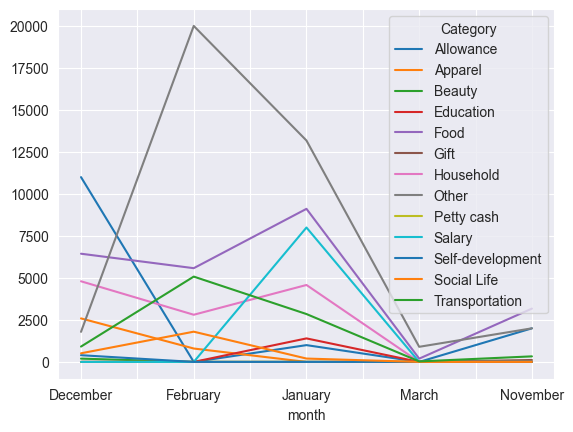

In [104]:
month_vs_category_INR.plot()

In [105]:
month_vs_income_expense_INR = expense_df.pivot_table(index='month', columns='Income/Expense', values='INR',
                                                     aggfunc='sum', fill_value=0)
month_vs_income_expense_INR

Income/Expense,Expense,Income
month,,
December,16334.44,12310.0
February,17864.65,18200.0
January,20679.51,19641.0
March,525.00,600.0
November,3620.40,4003.0


<Axes: xlabel='month'>

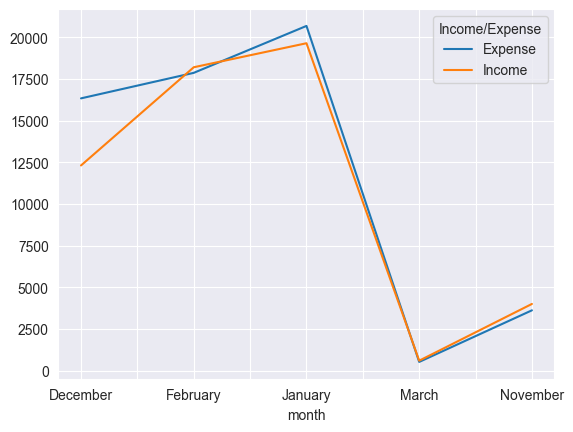

In [106]:
month_vs_income_expense_INR.plot()

In [135]:
month_vs_account_INR = expense_df.pivot_table(index='month', columns='Account', values='INR', aggfunc='sum',
                                              fill_value=0)
print(month_vs_account_INR)

Account   CUB - online payment     Cash
month                                  
December              27523.72  1120.72
February              36064.65     0.00
January               40320.51     0.00
March                  1125.00     0.00
November               7623.40     0.00


<Axes: xlabel='month'>

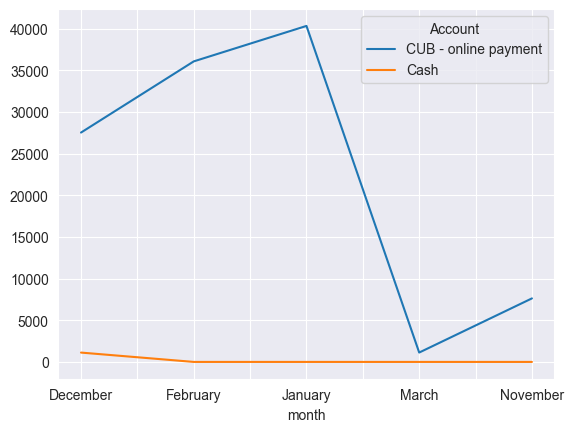

In [108]:
month_vs_account_INR.plot()

## From long to wide using pivot

In [142]:
import pandas as pd

# Sample long data
data = pd.DataFrame({
    'Date': ['2025-01-01', '2025-01-01', '2025-01-02', '2025-01-02'],
    'City': ['New York', 'Los Angeles', 'New York', 'Los Angeles'],
    'Temperature': [30, 25, 28, 22]
})
data


,Date,City,Temperature
0,2025-01-01,New York,30
1,2025-01-01,Los Angeles,25
2,2025-01-02,New York,28
3,2025-01-02,Los Angeles,22


In [143]:
# Pivot from long to wide
wide_data = data.pivot(index='Date', columns='City', values='Temperature')
print(wide_data)

City        Los Angeles  New York
Date                             
2025-01-01           25        30
2025-01-02           22        28
